In [12]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

import requests
from io import StringIO

%matplotlib inline

sns.set(rc={'figure.figsize':(15,10)})

In [13]:
def get_data_from_url(url):
    source = requests.get(url).text
    data = StringIO(source)
    return pd.read_csv(data)

In [14]:
df_sellers = get_data_from_url('https://raw.githubusercontent.com/GabezRules/SupplyDemand_simulation/master/sellers_montecarlo.csv')
df_buyers = get_data_from_url('https://raw.githubusercontent.com/GabezRules/SupplyDemand_simulation/master/buyers_montecarlo.csv')

In [15]:
dummies_buyers = pd.get_dummies(df_buyers, columns=['success'])
dummies_sellers = pd.get_dummies(df_sellers, columns=['success'])

In [16]:
df_buyers_mean = dummies_buyers.groupby(['day'],as_index = False).mean()
df_sellers_mean = dummies_sellers.groupby(['day'],as_index = False).mean()

In [17]:
df_buyers_mean = dummies_buyers.groupby(['generation', 'day'],as_index = False).mean()
df_sellers_mean = dummies_sellers.groupby(['generation', 'day'],as_index = False).mean()

In [18]:
df_buyers_mean.head()

,generation,day,max_value,expected_value,success_False,success_True
0,0,1,6.2,5.620000,0.2,0.8
1,0,2,6.2,5.170000,0.4,0.6
2,0,3,6.2,5.060600,0.6,0.4
3,0,4,6.2,4.634540,0.4,0.6
4,0,5,6.2,4.434794,0.6,0.4


In [21]:
df_buyers_mean.tail()

,generation,day,max_value,expected_value,success_False,success_True
99995,499,196,8.2,7.508739,1.0,0.0
99996,499,197,8.2,7.101699,0.4,0.6
99997,499,198,8.2,7.046830,0.6,0.4
99998,499,199,8.2,7.052977,0.6,0.4
99999,499,200,8.2,6.986361,0.6,0.4


In [52]:
df_sellers_sample = df_sellers_mean.loc[(df_sellers_mean['day']==1)&(df_sellers_mean['expected_value'] >= 5) & (df_sellers_mean['expected_value'] <= 6)]
df_buyers_sample = df_buyers_mean.loc[(df_buyers_mean['day']==1)&(df_buyers_mean['expected_value'] >= 5) & (df_buyers_mean['expected_value'] <= 6)]

In [37]:
def get_expected_value(i, df, label):
    n_df = df.loc[df['generation'] == i]
    n_list = n_df[label].tolist()
    return n_list

In [38]:
#500 generations
#plt.plot()
#plt.xlabel(days)
#plt.ylabel(expected value)
#plt.title("monte carlo analysis")

Text(0.5, 1.0, 'monte carlo - buyers')

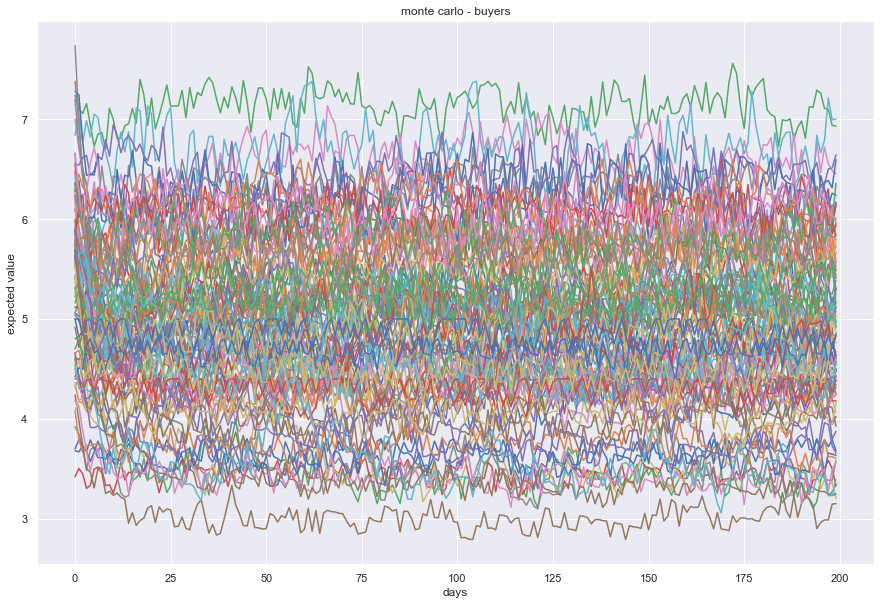

In [47]:
for i in range(100):
    plt.pyplot.plot(get_expected_value(i, df_buyers_mean, 'expected_value'))

plt.pyplot.xlabel("days")
plt.pyplot.ylabel("expected value")
plt.pyplot.title("monte carlo - buyers")

Text(0.5, 1.0, 'monte carlo - sellers')

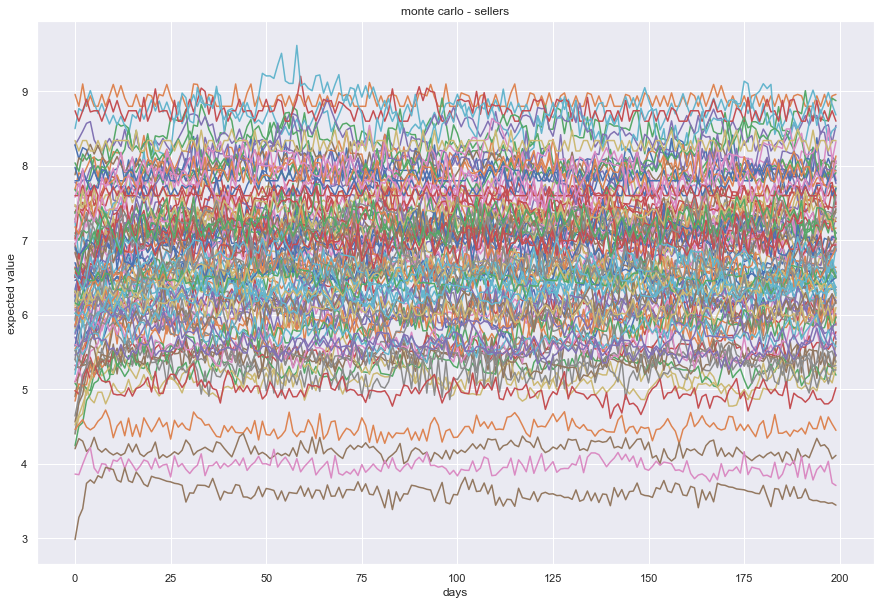

In [48]:
for i in range(100):
    plt.pyplot.plot(get_expected_value(i, df_sellers_mean, 'expected_value'))

plt.pyplot.xlabel("days")
plt.pyplot.ylabel("expected value")
plt.pyplot.title("monte carlo - sellers")

Text(0.5, 1.0, 'monte carlo - sellers - success index')

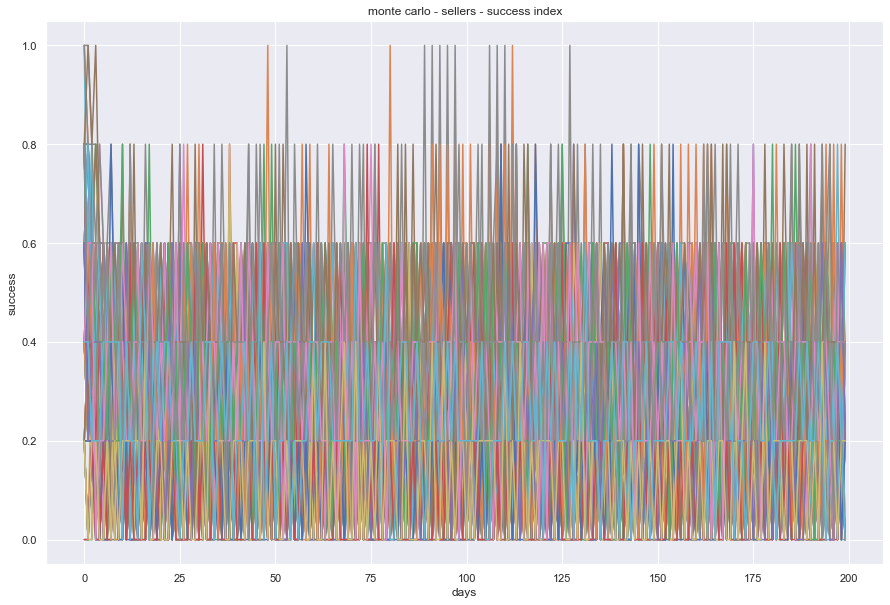

In [49]:
for i in range(100):
    plt.pyplot.plot(get_expected_value(i, df_sellers_mean, 'success_True'))

plt.pyplot.xlabel("days")
plt.pyplot.ylabel("success")
plt.pyplot.title("monte carlo - sellers - success index")

Text(0.5, 1.0, 'monte carlo - buyers - success index')

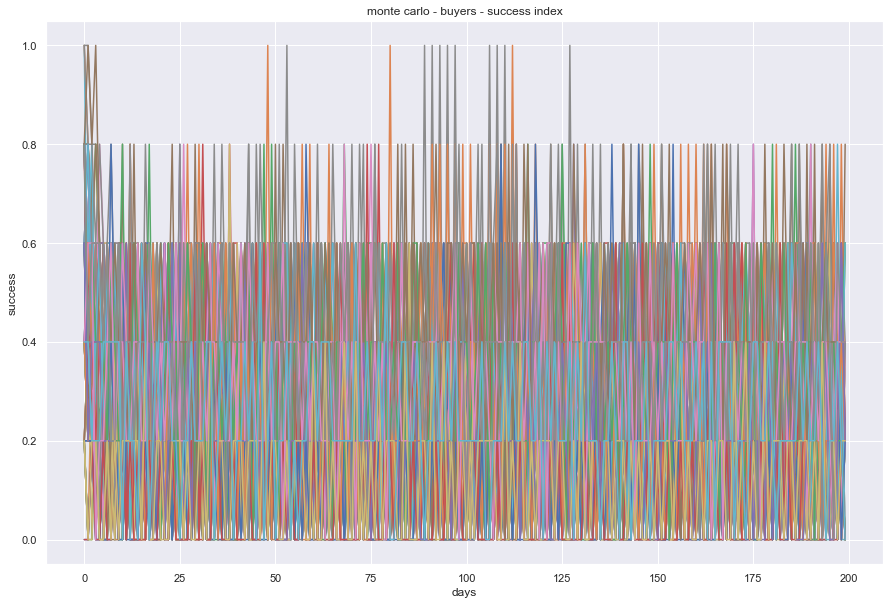

In [46]:
for i in range(100):
    plt.pyplot.plot(get_expected_value(i, df_buyers_mean, 'success_True'))

plt.pyplot.xlabel("days")
plt.pyplot.ylabel("success")
plt.pyplot.title("monte carlo - buyers - success index")

In [55]:
df_buyers_sample.head(10)

,generation,day,max_value,expected_value,success_False,success_True
0,0,1,6.2,5.62,0.2,0.8
200,1,1,5.8,5.62,0.8,0.2
800,4,1,6.2,5.62,0.2,0.8
1600,8,1,5.8,5.38,0.4,0.6
1800,9,1,6.0,5.88,0.8,0.2
2000,10,1,5.2,5.00,0.8,0.2
2400,12,1,6.0,5.52,0.4,0.6
2800,14,1,5.2,5.06,0.8,0.2
3000,15,1,6.2,5.68,0.2,0.8
3200,16,1,6.0,5.60,0.6,0.4
